# 導入套件

### [中選會 資料下載](https://vote2024.cec.gov.tw/zh-TW/indexP0.html)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # 中文輸出(台北黑體)

In [2]:
# Party2024
# Party2024.to_pickle('./Party2024.pkl')
Party2024 = pd.read_pickle('./Party2024.pkl')

In [3]:
City_lst = ['臺北市', '新北市', '臺中市', '臺南市', '高雄市', '基隆市', '桃園市', '新竹市', '新竹縣', '苗栗縣', '南投縣', '彰化縣', '雲林縣', '嘉義市', '嘉義縣', '屏東縣',  '宜蘭縣', '花蓮縣', '臺東縣', '澎湖縣', '連江縣', '金門縣']
party24 = Party2024.loc[:, [1, 6, 8, 9, 12]].groupby('City').sum().loc[City_lst].copy()
party24.columns = ['小歐盟', '民進黨', '時代力量', '國民黨', '民眾黨']
c_lst = ['#be1b74', '#1B9431', '#F9BE01', '#000095', '#28C8C8'] # 色碼

display(party24)

,小歐盟,民進黨,時代力量,國民黨,民眾黨
City,,,,,
臺北市,13828,511126,43243,575004,334389
新北市,24989,846766,63162,854558,556980
臺中市,16267,568839,46589,576758,416866
臺南市,10435,508784,27629,296987,214469
高雄市,15714,728109,36419,496423,283062
基隆市,2063,67018,4984,85320,48401
桃園市,14517,429373,32262,475063,338329
新竹市,2344,79721,12212,83499,77496
新竹縣,3099,79315,13186,132160,96734


In [4]:
arr = party24.values.T
arr = arr / arr.sum(0) * 100

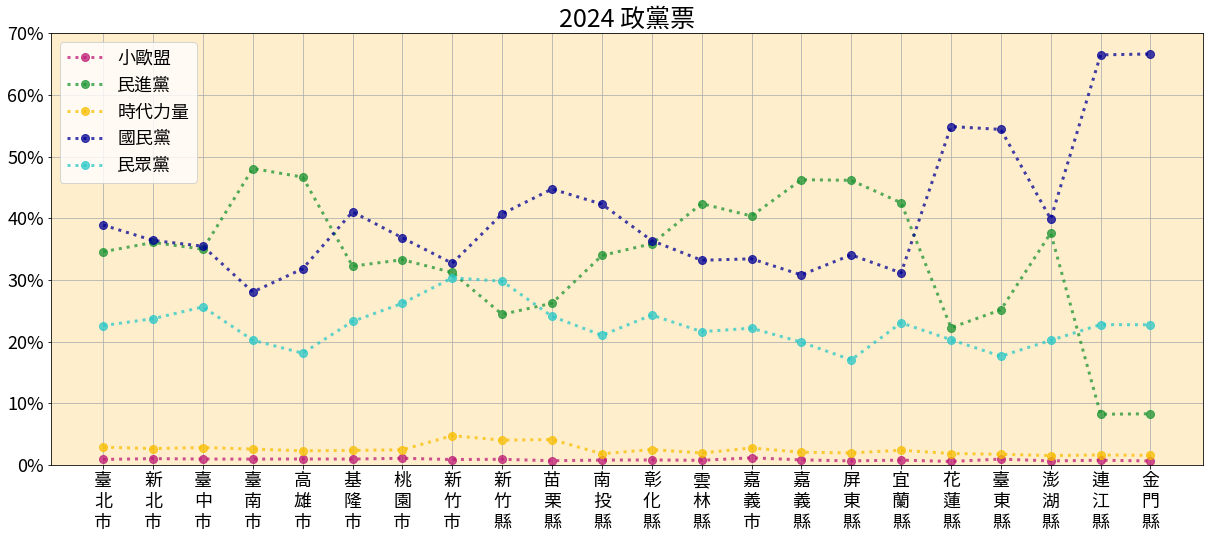

In [5]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(5):
    ax.plot(arr[i], 'o:', c=c_lst[i], ms=8, lw=3, alpha=0.75, label=party24.columns[i])
    
xticks = list(party24.index.str[-3]  + '\n' + party24.index.str[-2] + '\n' + party24.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 71, 10), [str(s)+'%' for s in range(0, 71, 10)], fontsize=18)
plt.ylim([0, 70])
plt.title('2024 政黨票', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)

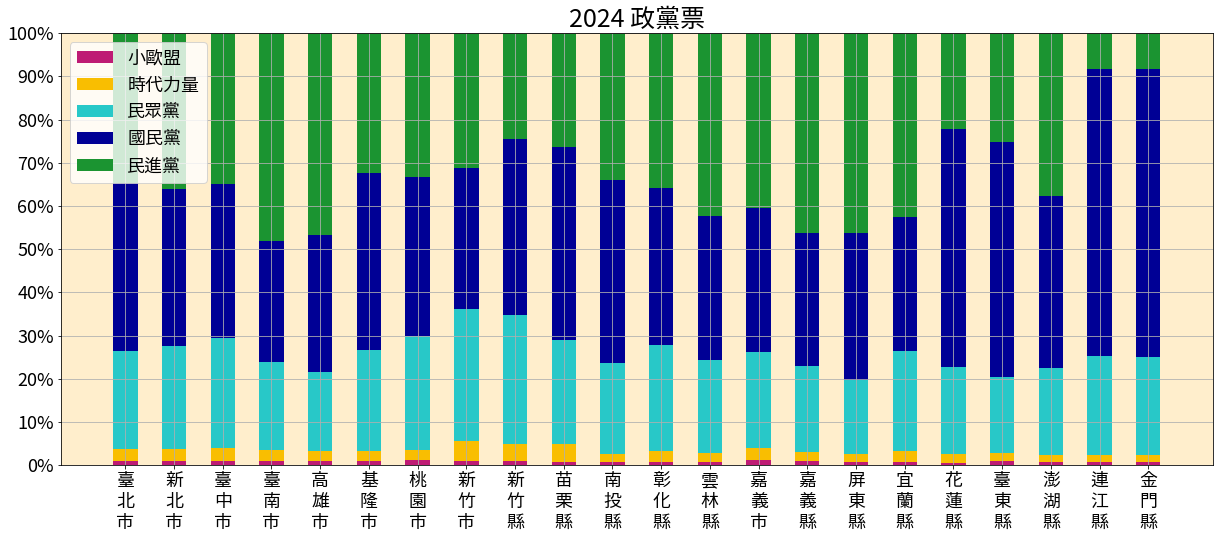

In [6]:
sort = [0, 2, 4, 3, 1] # 重新排列政黨
arrsort = arr[sort]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(5):
    ax.bar(np.arange(22), arr[sort[i]], 0.5,  yerr=np.zeros(22), color=c_lst[sort[i]],  bottom=arrsort[0:i, :].sum(0), label=party24.columns[sort[i]])
 
xticks = list(party24.index.str[-3]  + '\n' + party24.index.str[-2] + '\n' + party24.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 101, 10), [str(s)+'%' for s in range(0, 101, 10)], fontsize=18)
plt.ylim([0, 100])
plt.title('2024 政黨票', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)

# 2020

In [7]:
party20 = pd.read_pickle('./Party2020.pkl').loc[:, [3, 5, 6, 9, 14, 15]].loc[City_lst]
party20.columns = ['親民黨', '台灣基進', '時代力量', '國民黨', '民進黨', '民眾黨']
c_lst = np.array(['#ff6310', '#a73f24', '#f9be01', '#000095', '#1b9431', '#28c8c8']) # 色碼

display(party20)

,親民黨,台灣基進,時代力量,國民黨,民進黨,民眾黨
City,,,,,,
臺北市,65483,37166,131906,560522,494909,210977
新北市,103267,54603,198086,812468,826977,292750
臺中市,68244,59968,132765,556865,540803,219492
臺南市,34272,52177,87123,297216,486263,105740
高雄市,49787,104100,123820,527139,678564,148989
基隆市,10935,4822,18149,83668,65108,25853
桃園市,51776,28105,102127,454561,413343,158534
新竹市,10216,5866,29935,83412,73697,39822
新竹縣,13276,6053,29271,128459,75212,43726


In [8]:
arr = party20.values.T
arr = arr / arr.sum(0) * 100

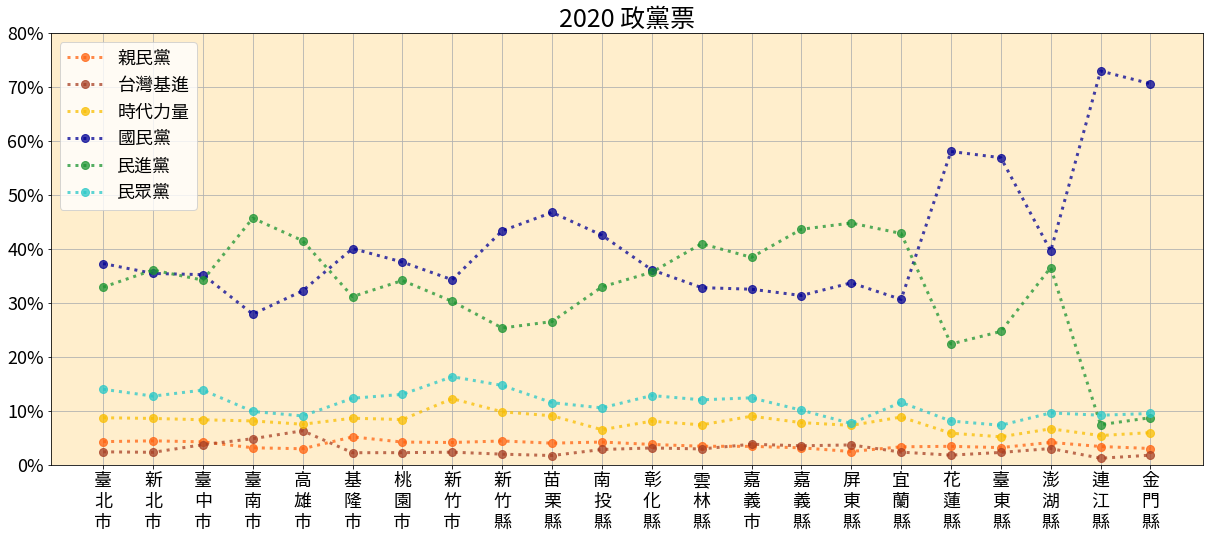

In [9]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(6):
    ax.plot(arr[i], 'o:', c=c_lst[i], ms=8, lw=3, alpha=0.75, label=party20.columns[i])
    
xticks = list(party20.index.str[-3]  + '\n' + party20.index.str[-2] + '\n' + party20.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 81, 10), [str(s)+'%' for s in range(0, 81, 10)], fontsize=18)
plt.ylim([0, 80])
plt.title('2020 政黨票', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)

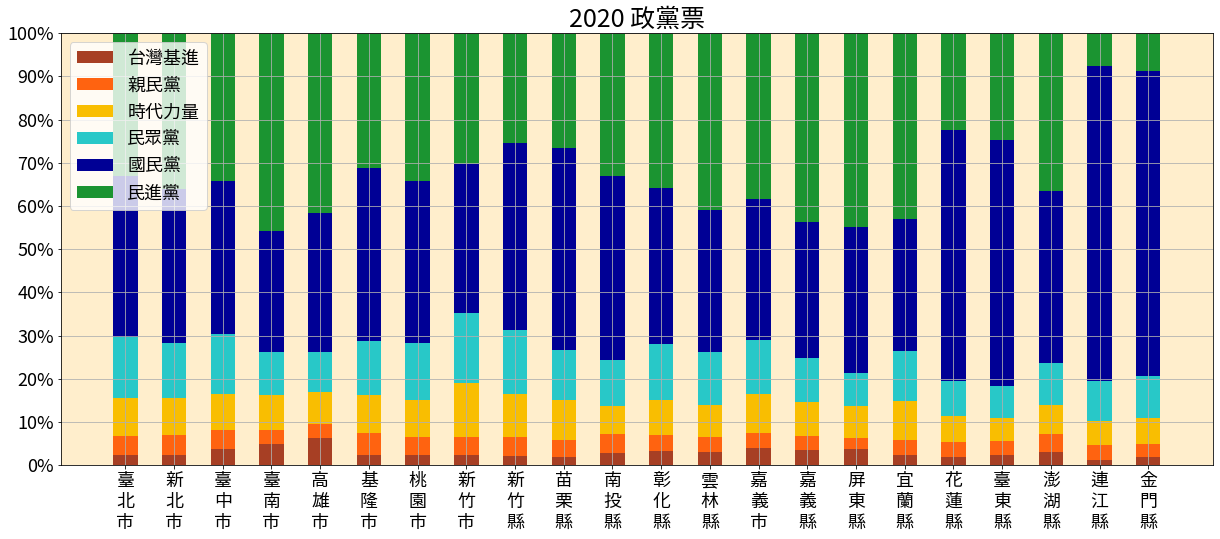

In [10]:
sort = [1, 0, 2, 5, 3, 4] # 重新排列政黨
arrsort = arr[sort]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(6):
    ax.bar(np.arange(22), arr[sort[i]], 0.5,  yerr=np.zeros(22), color=c_lst[sort[i]],  bottom=arrsort[0:i, :].sum(0), label=party20.columns[sort[i]])
 
xticks = list(party20.index.str[-3]  + '\n' + party20.index.str[-2] + '\n' + party20.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 101, 10), [str(s)+'%' for s in range(0, 101, 10)], fontsize=18)
plt.ylim([0, 100])
plt.title('2020 政黨票', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)